# Exploratory Data Analysis

In [10]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('final_data.csv')
df.head()

,Unnamed: 0,created_at_month,patient_id,folk_1_code,folk_2_code,folk_3_code,folk_4_code,comment_len,service_code,service_level_3_category_hash,...,standartized_diagnosis_len,diagnosis_uuid,diagnosis_category_level_3_hash,service_status,diagnosis_category_level_1_hash,service_quantity,cnt_visit,дата убытка,loss,month
0,0,2020-07,3383,1,1,1,1,211.000000,1,1,...,0.0,1,1,0.428571,1,1.000,1,2020-07-19,6.84,2020-07
1,1,2020-07,3533,2,1,2,1,72.166667,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-31,2.09,2020-07
2,2,2020-07,3533,2,1,2,1,72.166667,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-19,3.15,2020-07
3,3,2020-07,3533,2,1,2,1,72.166667,2,2,...,0.0,1,1,0.000000,1,3.125,2,2020-07-17,9.20,2020-07
4,4,2020-07,3673,1,1,1,1,31.000000,1,1,...,0.0,1,1,0.000000,1,5.000,1,2020-07-15,2.72,2020-07


In [6]:
df = df.loc[df['loss'].notna()]

In [44]:
df['дата убытка'] = pd.to_datetime(df['дата убытка'])


### Корреляция

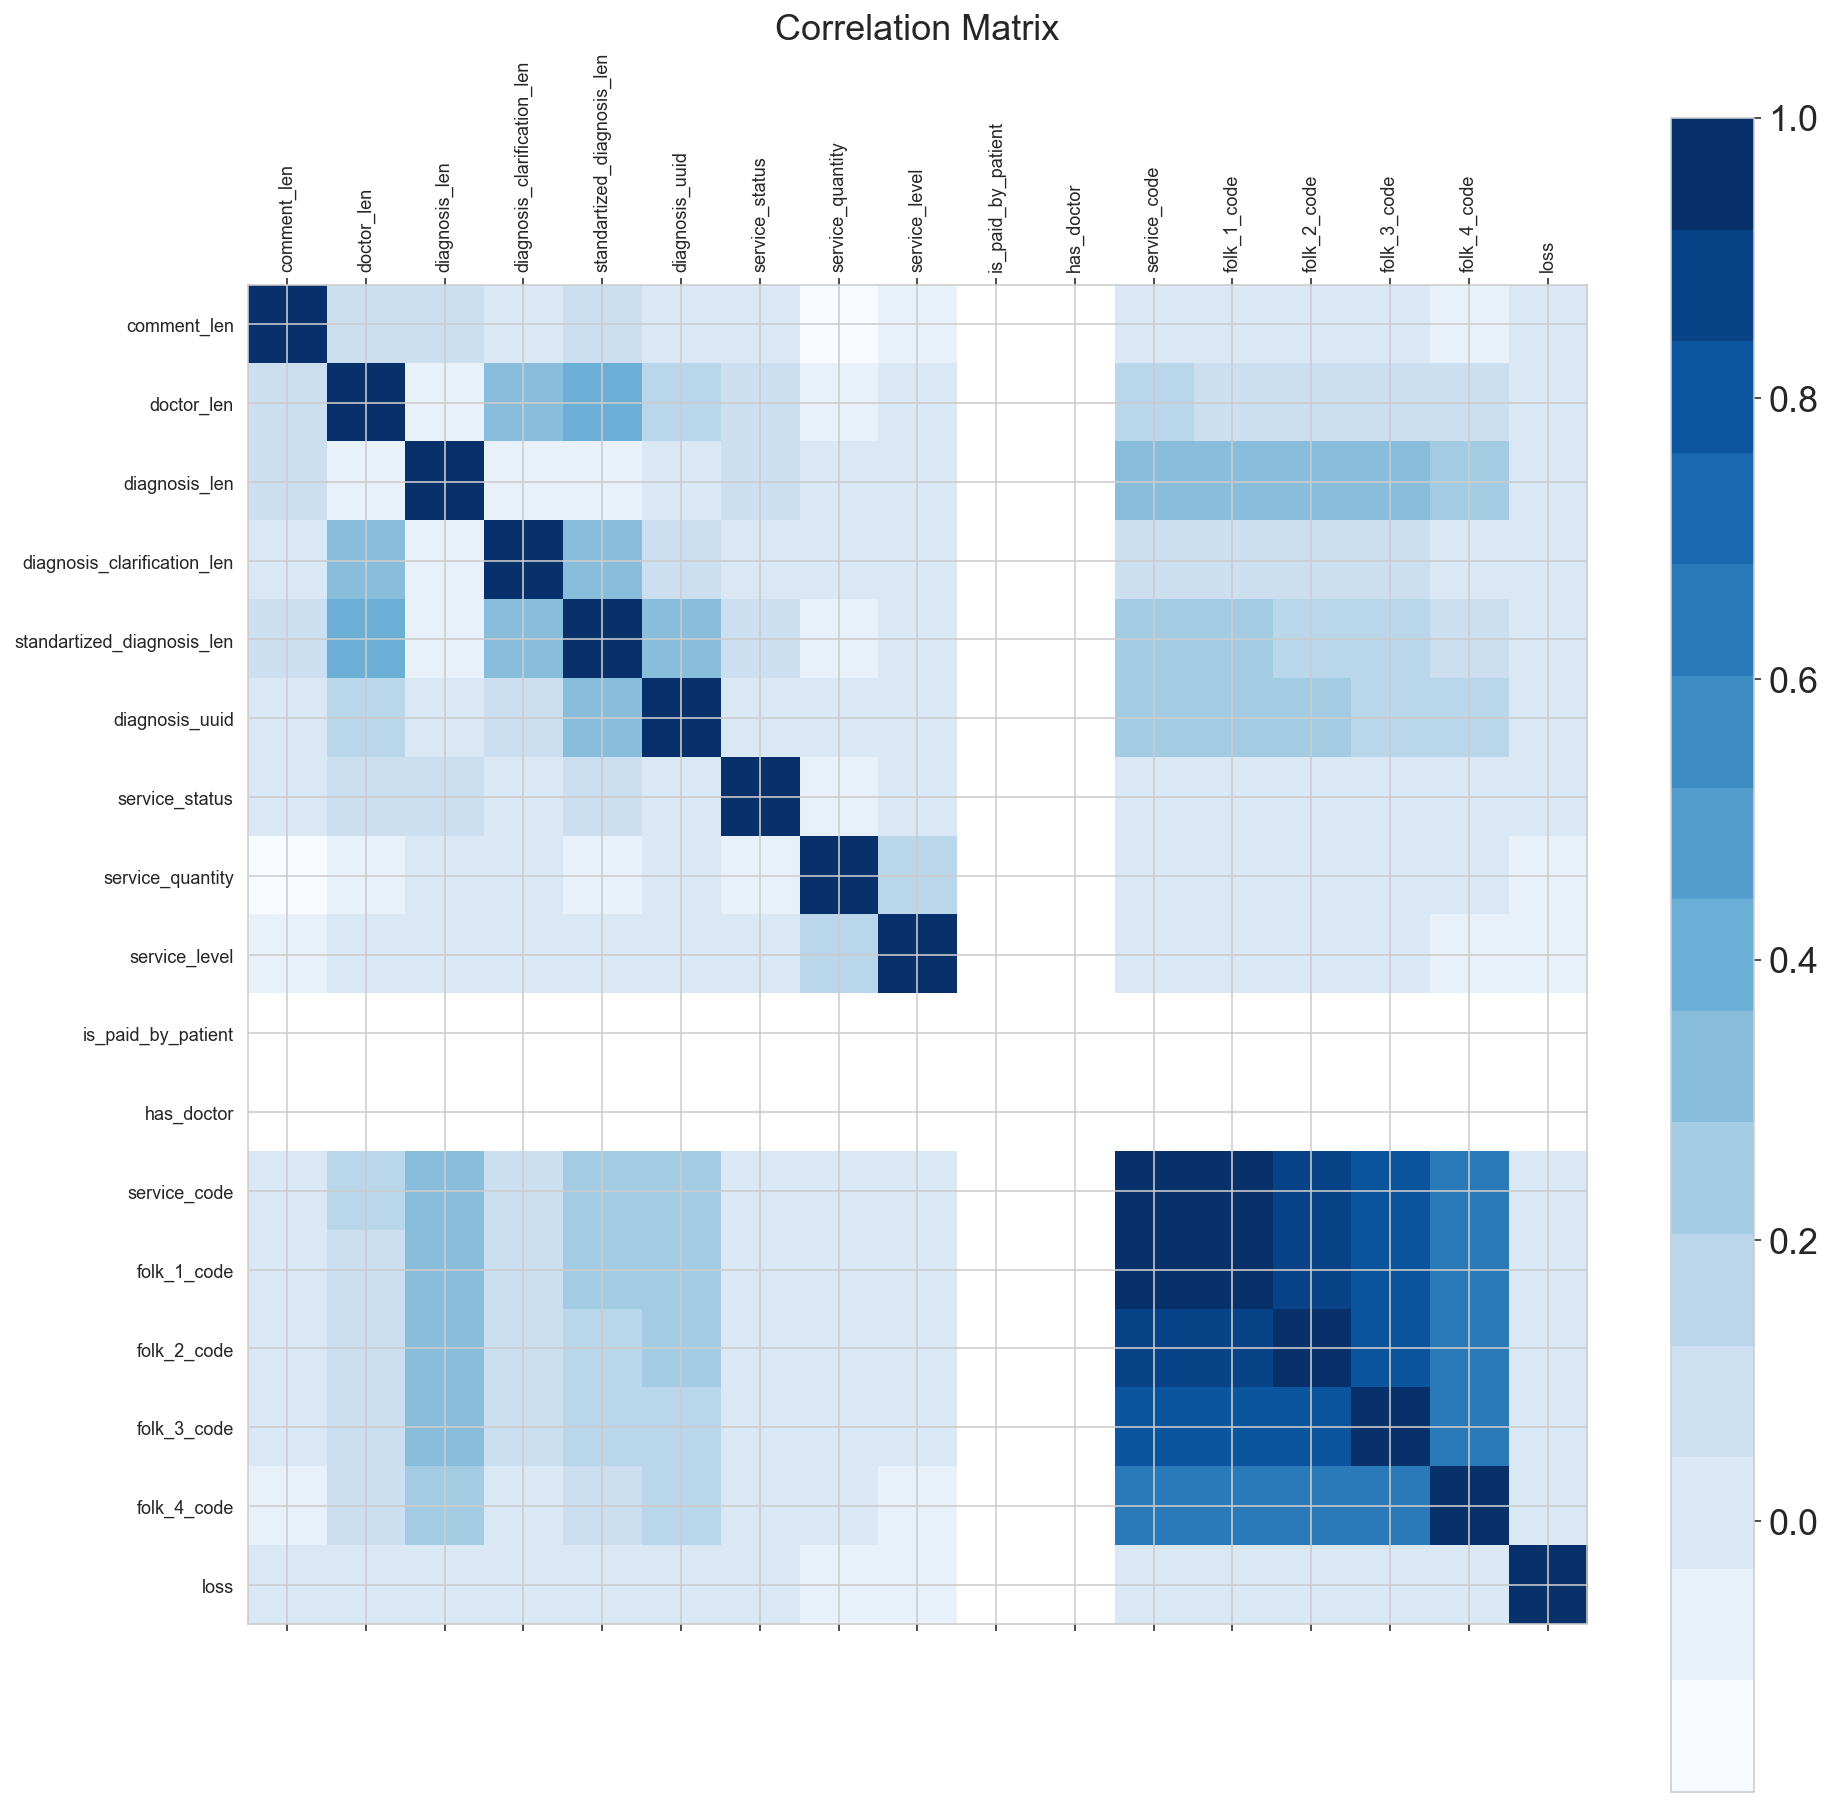

In [100]:
f = plt.figure(figsize=(15, 15))
df_corr = df[["comment_len", "doctor_len", "diagnosis_len", "diagnosis_clarification_len", "standartized_diagnosis_len",
                    'diagnosis_uuid',"service_status", "service_quantity", "service_level", "is_paid_by_patient", "has_doctor", 
                       "service_code", "folk_1_code", "folk_2_code", "folk_3_code", "folk_4_code", 'loss']]

plt.matshow(df_corr.corr(), fignum=f.number, cmap=plt.cm.get_cmap('Blues', 15))
plt.xticks(range(len(df_corr.columns)), df_corr.columns, fontsize=9, rotation=90)
plt.yticks(range(len(df_corr.columns)), df_corr.columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.title('Correlation Matrix', fontsize=18);

### Дата создания письма

In [34]:
df2 = pd.DataFrame()
df2['date'] = df['дата убытка']
df2['created'] = 1
df2['date'] = df2['date'].dt.month

Text(0, 0.5, 'Дата')

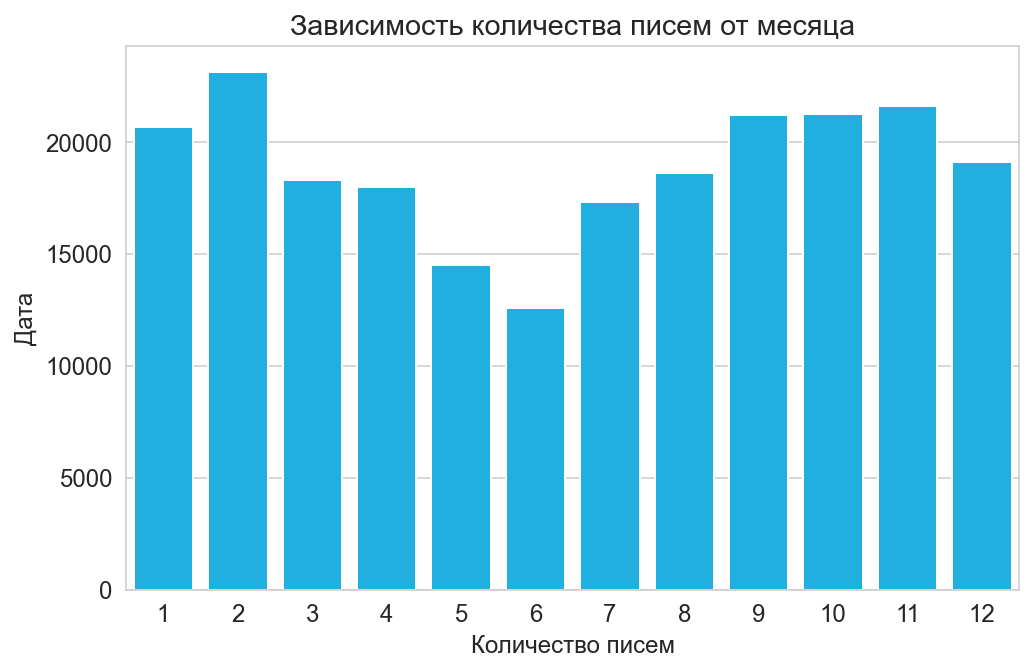

In [41]:
sns.countplot(data=df2, x = 'date', color='deepskyblue')
plt.title("Зависимость количества писем от месяца")
plt.xlabel("Количество писем")
plt.ylabel("Дата")

Как видим, наибольшее количество гарантийных писем поступает осенью и зимой.

Text(0, 0.5, 'День недели')

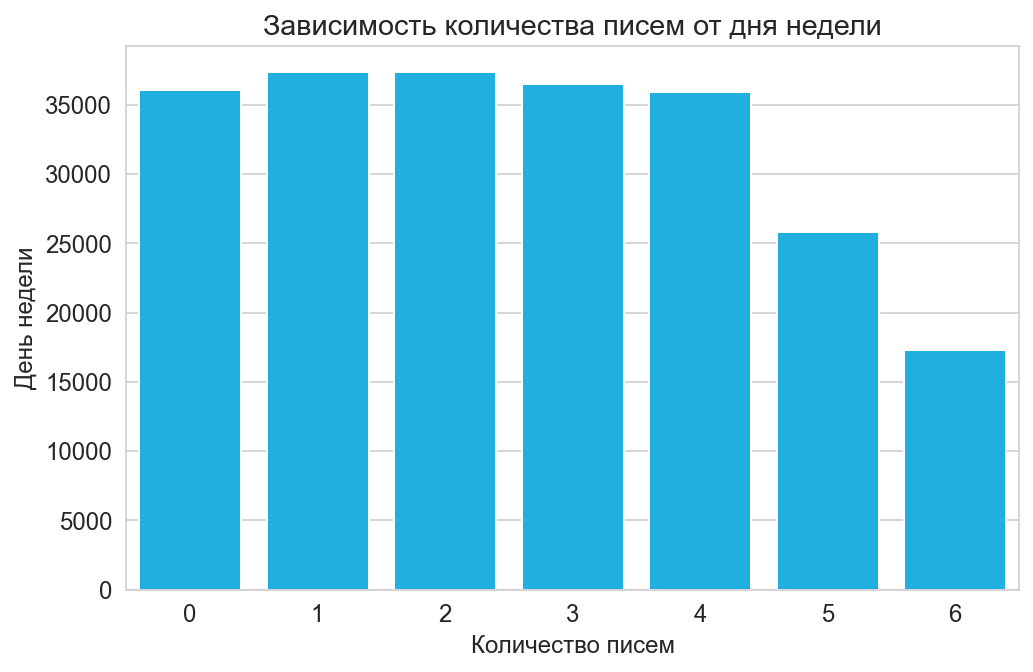

In [43]:
df2['date'] = df['дата убытка']
df2['date'] = df2['date'].dt.dayofweek
sns.countplot(data=df2, x = 'date', color='deepskyblue')
plt.title("Зависимость количества писем от дня недели")
plt.xlabel("Количество писем")
plt.ylabel("День недели")

Наибольшее количество гарантийных писем поступает в рабочие дни.

### Статус гарантийного письма

Text(0, 0.5, 'Количество писем')

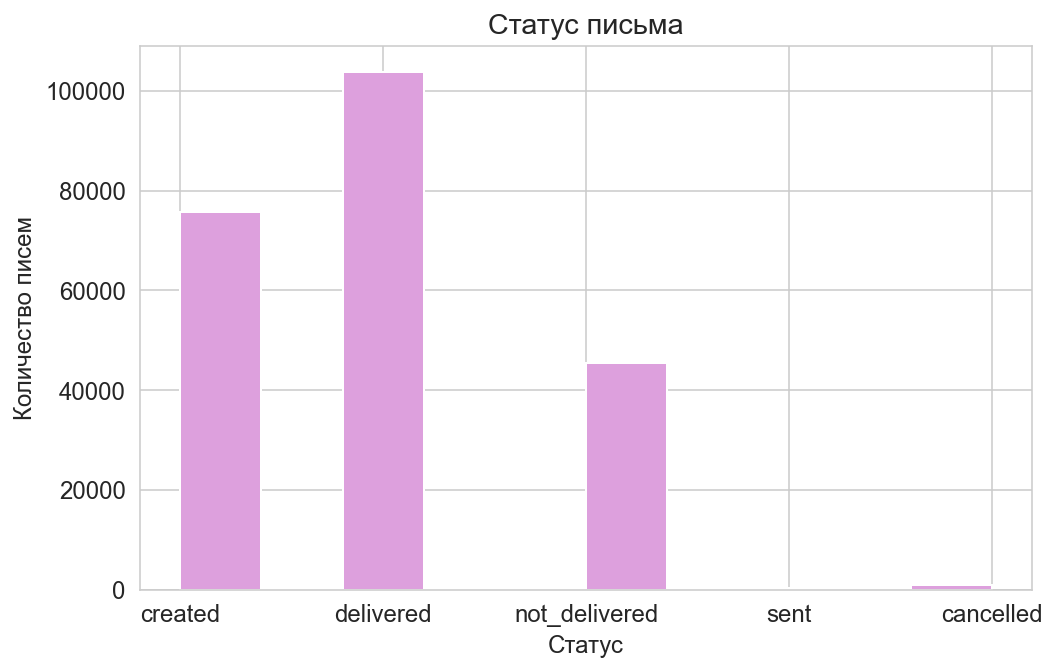

In [69]:
plt.hist(df.status, color='plum')
plt.title("Статус письма")
plt.xlabel("Статус")
plt.ylabel("Количество писем")

### Комментарий

Text(5.710000000000001, 0.5, 'Затраты')

<Figure size 720x720 with 0 Axes>

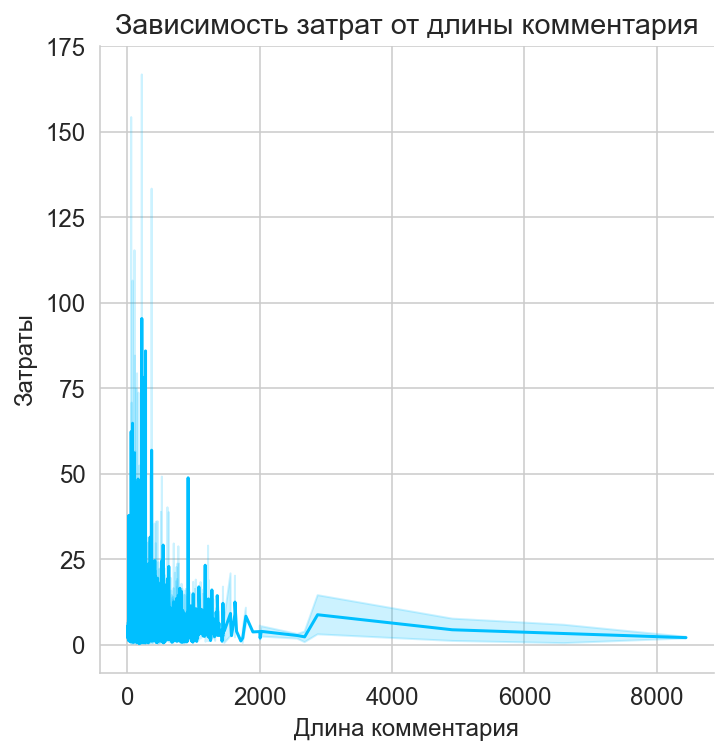

In [59]:
plt.figure(figsize=(10, 10))
sns.relplot(data = df, x = 'comment_len', y = 'loss', kind='line', color='deepskyblue')
plt.title("Зависимость затрат от длины комментария")
plt.xlabel("Длина комментария")
plt.ylabel("Затраты")

Есть небольшая зависимость. Чем длиннее комментарий, тем меньше затраты.

### Комментарий доктора

In [76]:
df.has_doctor.value_counts()

True    226377
Name: has_doctor, dtype: int64

Во всех письмах есть комментарий доктора, посмотрим, зависят ли затраты от длины комментария.

Text(12.335, 0.5, 'Затраты')

<Figure size 720x720 with 0 Axes>

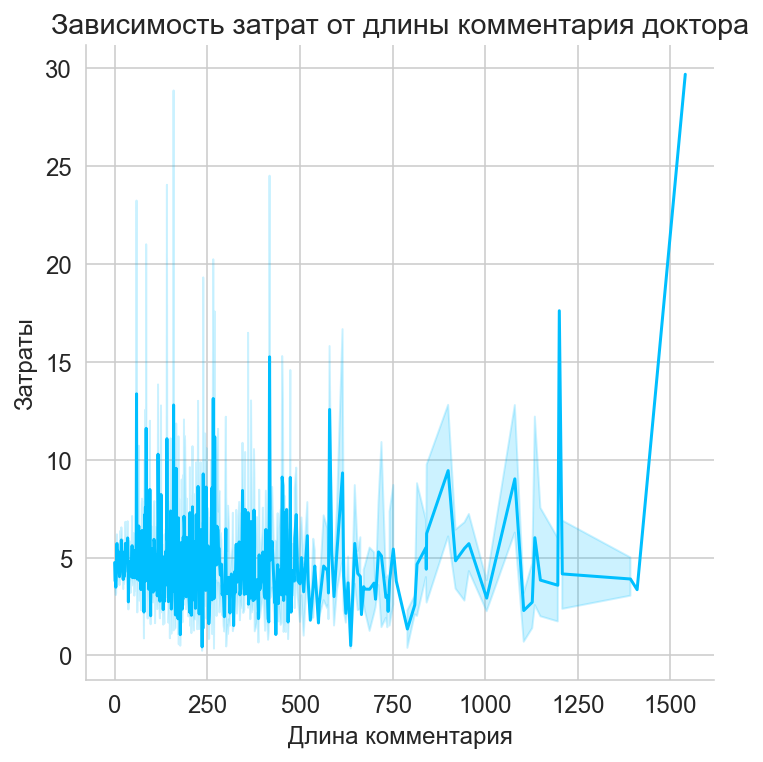

In [58]:
plt.figure(figsize=(10, 10))
sns.relplot(data = df, x = 'doctor_len', y = 'loss', kind='line', color='deepskyblue')
plt.title("Зависимость затрат от длины комментария доктора")
plt.xlabel("Длина комментария")
plt.ylabel("Затраты")

На зависимость не очень похоже

### Диагноз

Text(12.335, 0.5, 'Затраты')

<Figure size 720x720 with 0 Axes>

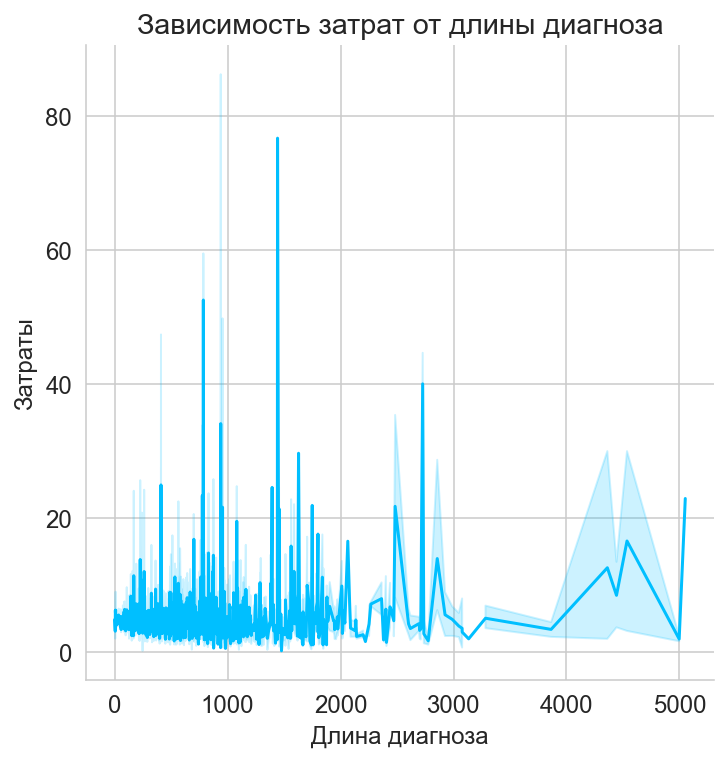

In [57]:
plt.figure(figsize=(10, 10))
sns.relplot(data = df, x = 'standartized_diagnosis_len', y = 'loss', kind='line', color='deepskyblue')
plt.title("Зависимость затрат от длины диагноза")
plt.xlabel("Длина диагноза")
plt.ylabel("Затраты")

Здесь явной зависимости тоже нет

### Service status

Text(0, 0.5, 'Количество писем')

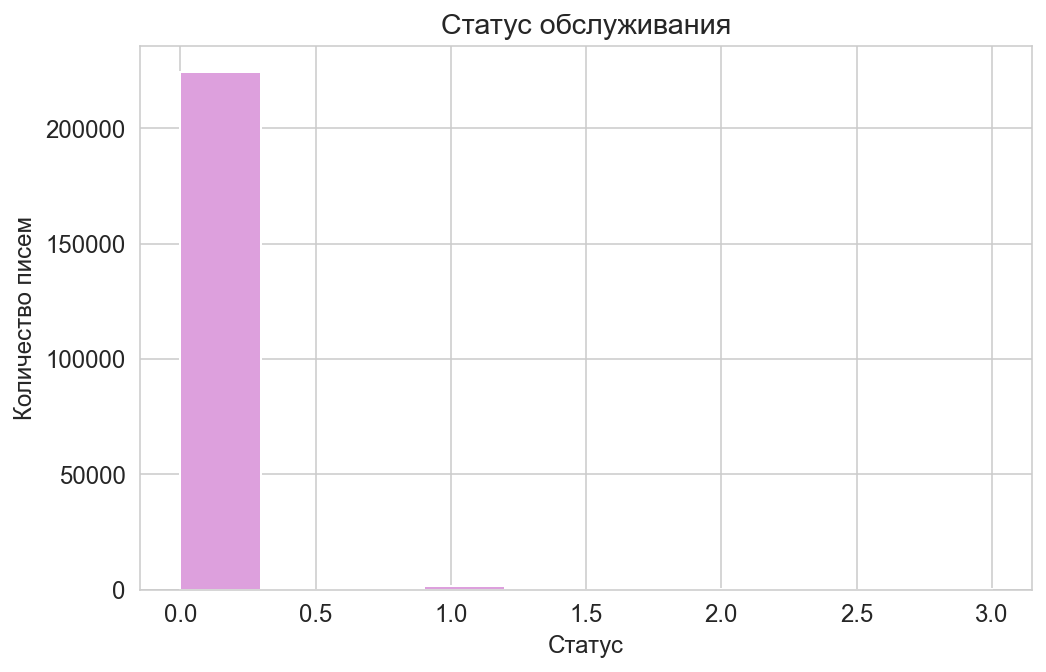

In [79]:
plt.hist(df.service_status.astype(int), color='plum')
plt.title("Статус обслуживания")
plt.xlabel("Статус")
plt.ylabel("Количество писем")

0 - одобрено, 1- отказ, 2 - не требует согласования, 3 - остальные случаи

Как видим, большинство заявок было одобрено

### Service level

Посмотрим, зависят ли затраты от уровня обслуживания

Text(0, 0.5, 'Количество писем')

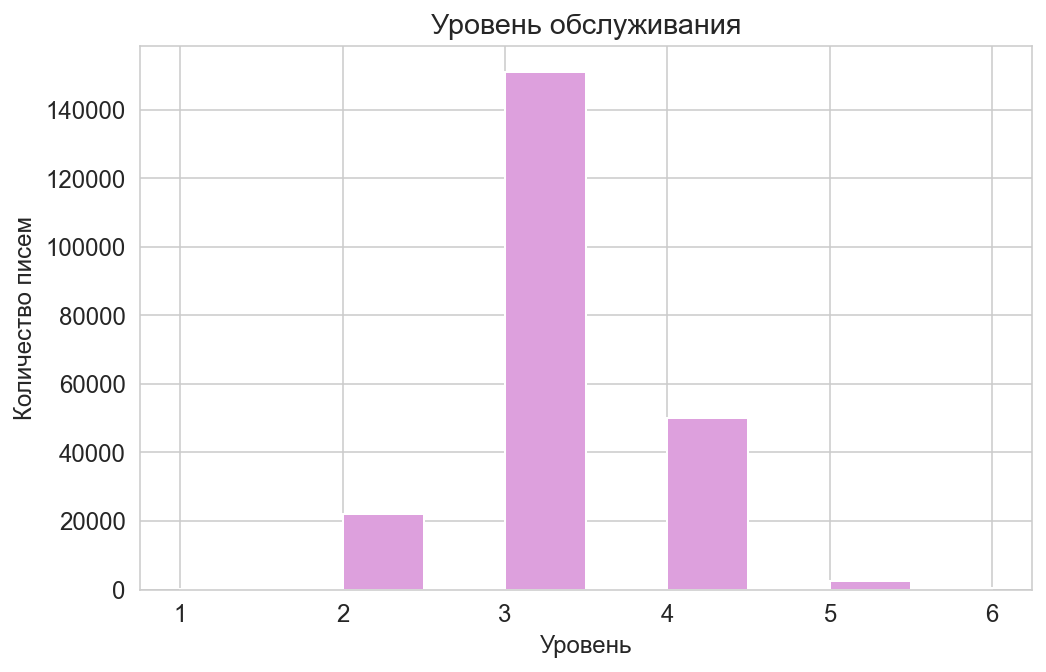

In [96]:
plt.hist(df.service_level.astype(int), color='plum')
plt.title("Уровень обслуживания")
plt.xlabel("Уровень")
plt.ylabel("Количество писем")

Text(0, 0.5, 'Затраты')

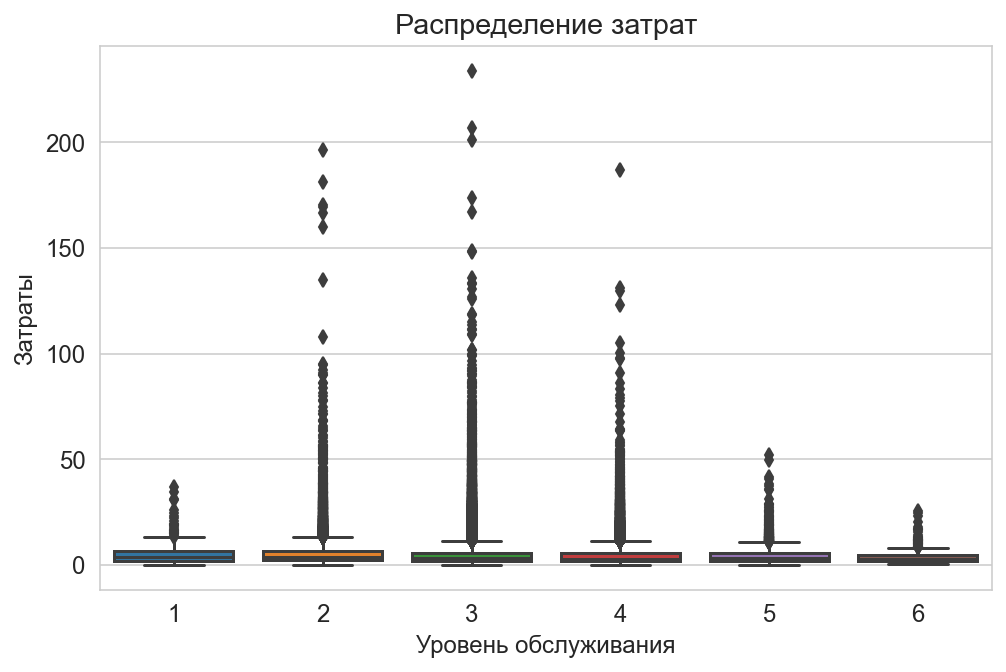

In [107]:
df.service_level = df.service_level.astype(int)
sns.boxplot(x='service_level', y='loss', data=df)

plt.title("Распределение затрат")
plt.xlabel("Уровень обслуживания")
plt.ylabel("Затраты")

При всех уровнях обслуживания затраты примерно одинаковые.